In [1]:
%cd yolov3
# %pip install -qr requirements.txt  # install

import torch
from yolov3 import utils
display = utils.notebook_init()  # checks

YOLOv3 🚀 2022-5-2 torch 1.9.0 CUDA:0 (GeForce RTX 3090, 24268MiB)


Setup complete ✅


detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 2022-5-2 torch 1.9.0 CUDA:0 (GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/5 /remote-home/lmzhao/midTerm/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, 1 tie, Done. (0.030s)
image 2/5 /remote-home/lmzhao/midTerm/yolov3/data/images/sample1.jpg: 448x640 1 person, 1 horse, Done. (0.039s)
image 3/5 /remote-home/lmzhao/midTerm/yolov3/data/images/sample2.jpg: 448x640 4 sheeps, Done. (0.020s)
image 4/5 /remote-home/lmzhao/midTerm/yolov3/data/images/sample3.jpg: 448x640 2 persons, 1 train, 1 traffic

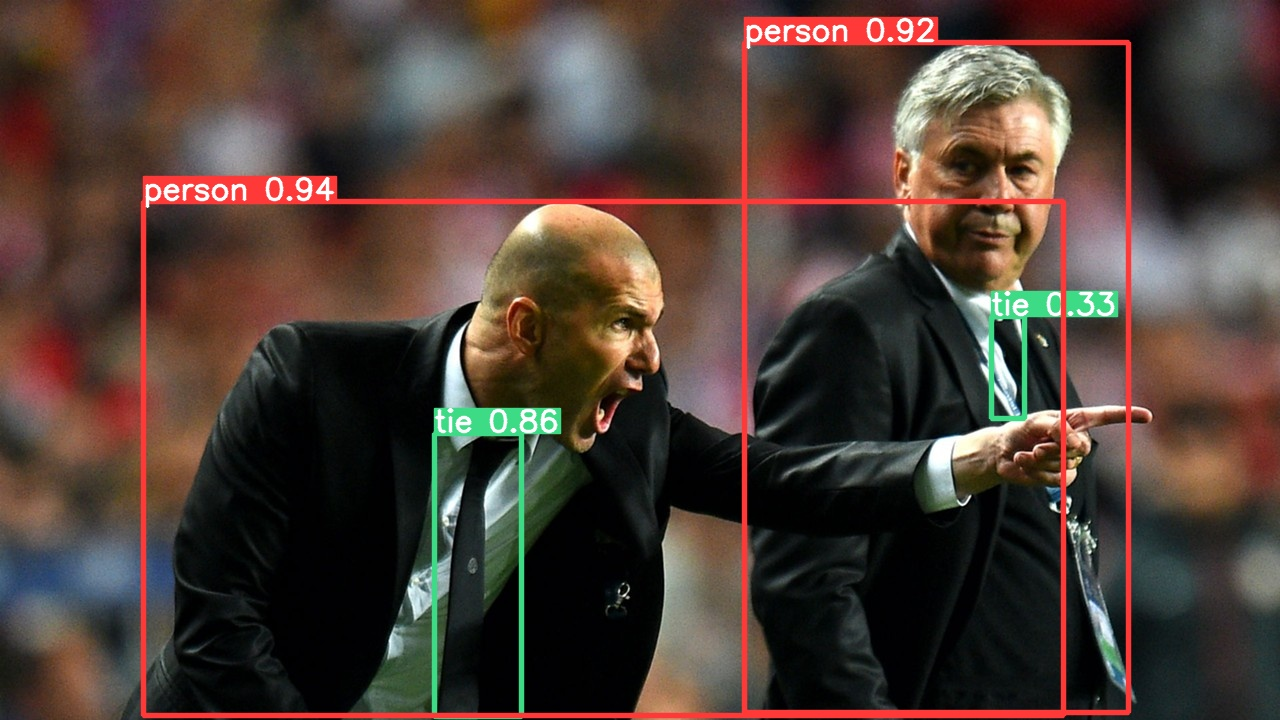

In [2]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

## 1. Train

In [ ]:
# Tensorboard  (optional)
%load_ext tensorboard
%tensorboard --logdir runs/train/exp2

In [2]:
# Weights & Biases  (optional)
import wandb
wandb.login()

# 如果不希望被记录，在 train 之前运行 
# wandb disabled

# 如果想恢复记录，在 train 之前运行
# wandb online

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: lockegogo. Use `wandb login --relogin` to force relogin


True

In [5]:
# Train YOLOv3 on voc for 300 epochs
!python train.py --img 640 --batch 16 --epochs 300 --data voc.yaml --weights yolov3.pt --cache 

# 观察训练曲线，提前停止

wandb: Currently logged in as: lockegogo. Use `wandb login --relogin` to force relogin
train: weights=yolov3.pt, cfg=, data=voc.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=True, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=8, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov3
Resuming training from ./runs/train/exp2/weights/last.pt
YOLOv3 🚀 2022-5-2 torch 1.9.0 CUDA:0 (GeForce RTX 3090, 24268MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, bo

In [4]:
# plot 'results.csv' as 'results.png'
from utils.plots import plot_results 
plot_results('runs/train/exp2/results.png')  

## 2. Test

In [3]:
!cp  runs/train/exp2/weights/best.pt   best.pt

In [4]:
!python val.py --weights best.pt --data voc.yaml --img 640 --iou 0.65 --half

val: data=/remote-home/lmzhao/midTerm/yolov3/data/voc.yaml, weights=['best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv3 🚀 2022-5-2 torch 1.9.0 CUDA:0 (GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model Summary: 261 layers, 61599745 parameters, 0 gradients
val: Scanning '../datasets/VOC/labels/test2007.cache' images and labels... 4952 
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all       4952      12032      0.831      0.834      0.878      0.656
           aeroplane       4952        285      0.923      0.874      0.938      0.657
             bicycle       4952        337      0.922      0.887      0.949      0.713
                bird       4952        459      0.865      0.821      0.874      0.622
   

## 3. Detect

In [5]:
!python detect.py --weights best.pt --img 640 --conf 0.25 --source data/images

detect: weights=['best.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 2022-5-2 torch 1.9.0 CUDA:0 (GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model Summary: 261 layers, 61599745 parameters, 0 gradients
image 1/5 /remote-home/lmzhao/midTerm/yolov3/data/images/bus.jpg: 640x480 1 bicycle, 1 bus, 4 persons, Done. (0.031s)
image 2/5 /remote-home/lmzhao/midTerm/yolov3/data/images/sample1.jpg: 448x640 1 horse, 1 person, Done. (0.023s)
image 3/5 /remote-home/lmzhao/midTerm/yolov3/data/images/sample2.jpg: 448x640 4 sheeps, Done. (0.022s)
image 4/5 /remote-home/lmzhao/midTerm/yolov3/data/images/sample3.jpg: 448x640 1 bicycle, 1 train, Done. (0.020s)
ima

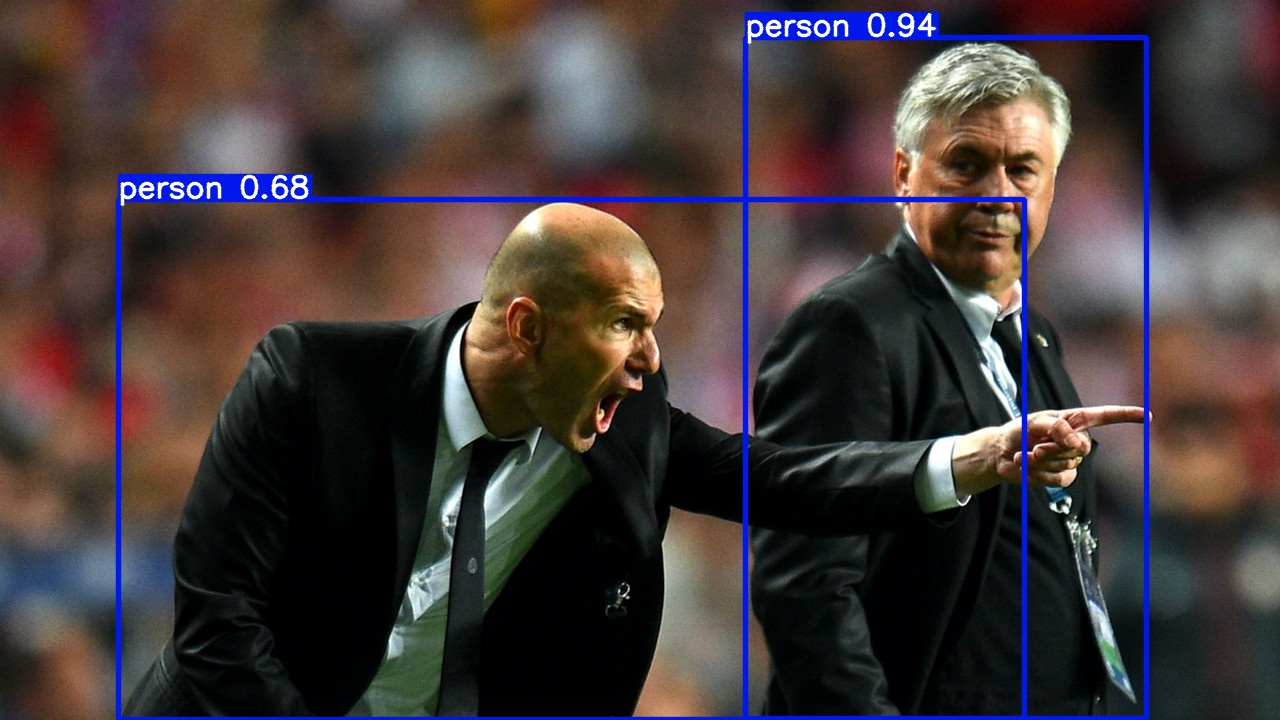

In [6]:
display.Image(filename='runs/detect/exp2/zidane.jpg', width=600)

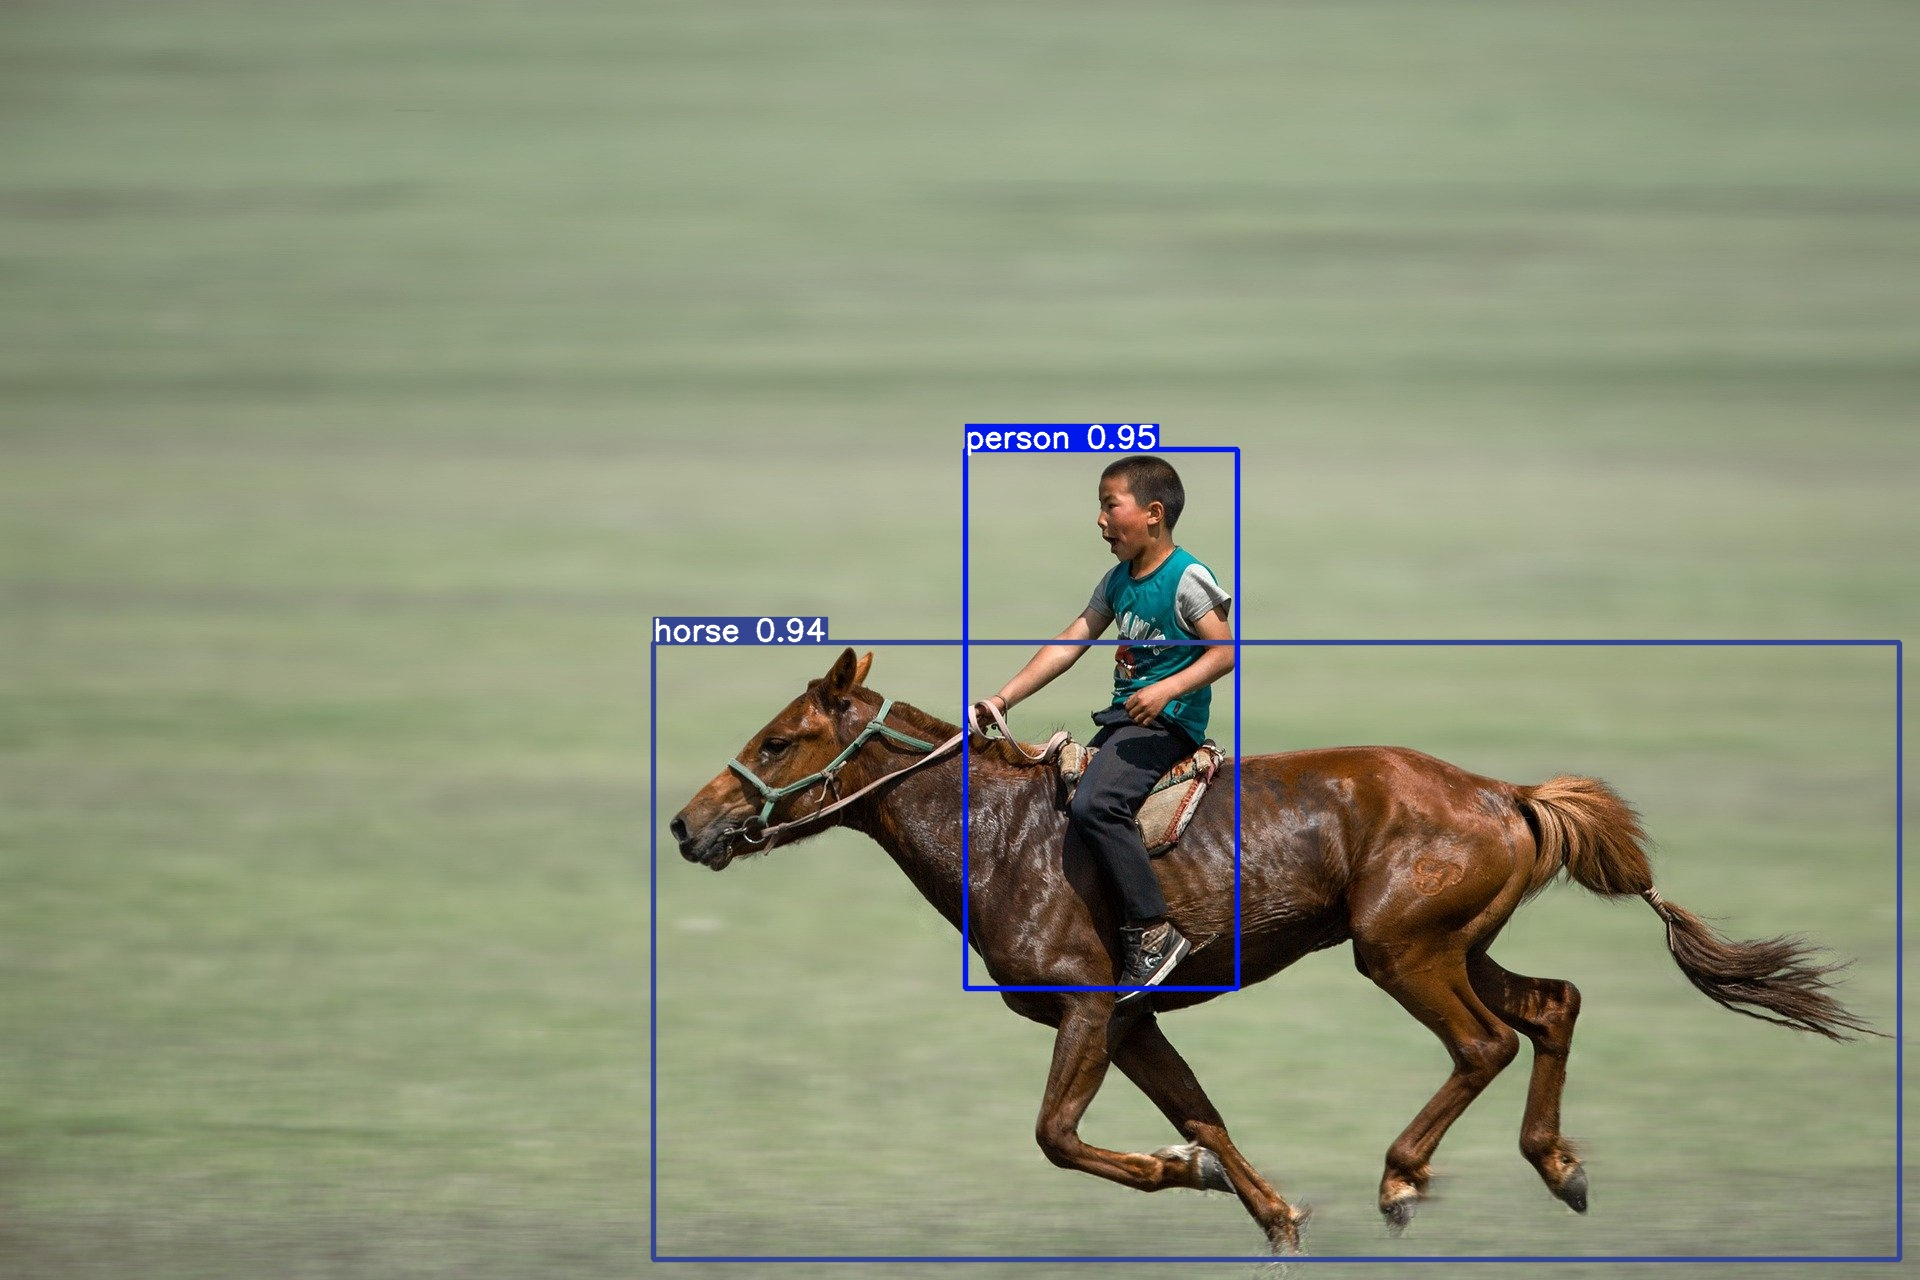

In [7]:
display.Image(filename='runs/detect/exp2/sample1.jpg', width=600)